## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
from keras.regularizers import l2
from keras.layers import Dropout, BatchNormalization

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2, l2_ratio=1e-4, ):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATES = [1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for learning_rate in LEARNING_RATES:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with learning rate = %.6f" % learning_rate)

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=learning_rate, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-learning-rate-%s" % str(learning_rate)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with learning rate = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 4s 73us/step - loss: 1.4666 - accuracy: 0.5149 - val_loss: 1.4910 - val_accuracy: 0.5033
Epoch 44/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4481 - accuracy: 0.5217 - val_loss: 1.4742 - val_accuracy: 0.5102
Epoch 45/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4579 - accuracy: 0.5173 - val_loss: 1.4718 - val_accuracy: 0.5065
Epoch 46/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.4439 - accuracy: 0.5205 - val_loss: 1.5078 - val_accuracy: 0.4988
Epoch 47/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4435 - accuracy: 0.5239 - val_loss: 1.5398 - val_accuracy: 0.4928
Epoch 48/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4484 - accuracy: 0.5223 - val_loss: 1.5405 - val_accuracy: 0.4864
Epoch 49/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.4467 - accuracy: 0.5231 - val_loss: 1.4569

50000/50000 [==============================] - 4s 86us/step - loss: 1.4734 - accuracy: 0.5209 - val_loss: 1.5462 - val_accuracy: 0.4884
Epoch 36/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.4738 - accuracy: 0.5200 - val_loss: 1.5111 - val_accuracy: 0.5038
Epoch 37/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4617 - accuracy: 0.5229 - val_loss: 1.5379 - val_accuracy: 0.4987
Epoch 38/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4492 - accuracy: 0.5288 - val_loss: 1.5365 - val_accuracy: 0.4987
Epoch 39/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.4367 - accuracy: 0.5336 - val_loss: 1.5530 - val_accuracy: 0.4986
Epoch 40/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4357 - accuracy: 0.5333 - val_loss: 1.5179 - val_accuracy: 0.4977
Epoch 41/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.4381 - accuracy: 0.5324 - val_loss: 1.4944

50000/50000 [==============================] - 4s 77us/step - loss: 1.7864 - accuracy: 0.4135 - val_loss: 1.6615 - val_accuracy: 0.4576
Epoch 28/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7849 - accuracy: 0.4154 - val_loss: 1.6527 - val_accuracy: 0.4619
Epoch 29/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.7701 - accuracy: 0.4200 - val_loss: 1.6461 - val_accuracy: 0.4614
Epoch 30/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.7694 - accuracy: 0.4195 - val_loss: 1.6449 - val_accuracy: 0.4651
Epoch 31/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7581 - accuracy: 0.4244 - val_loss: 1.6466 - val_accuracy: 0.4658
Epoch 32/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.7527 - accuracy: 0.4258 - val_loss: 1.6350 - val_accuracy: 0.4657
Epoch 33/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.7478 - accuracy: 0.4259 - val_loss: 1.6295

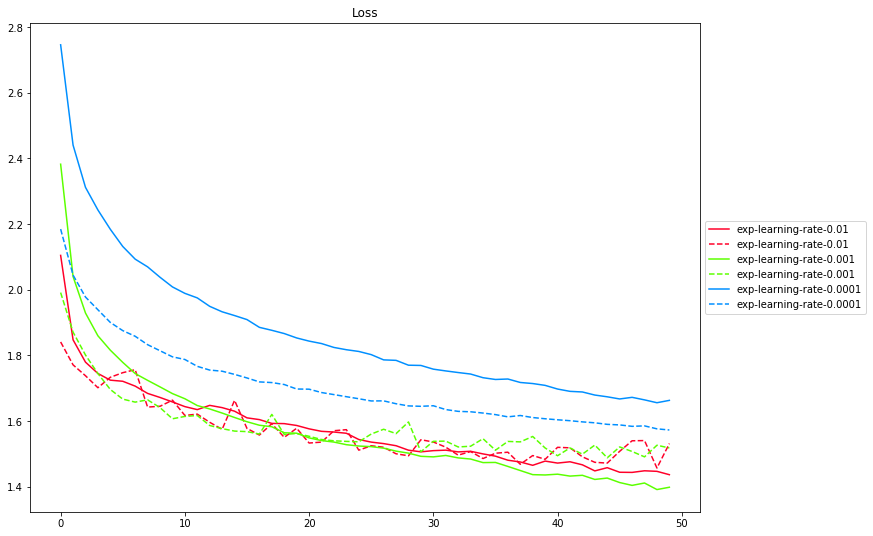

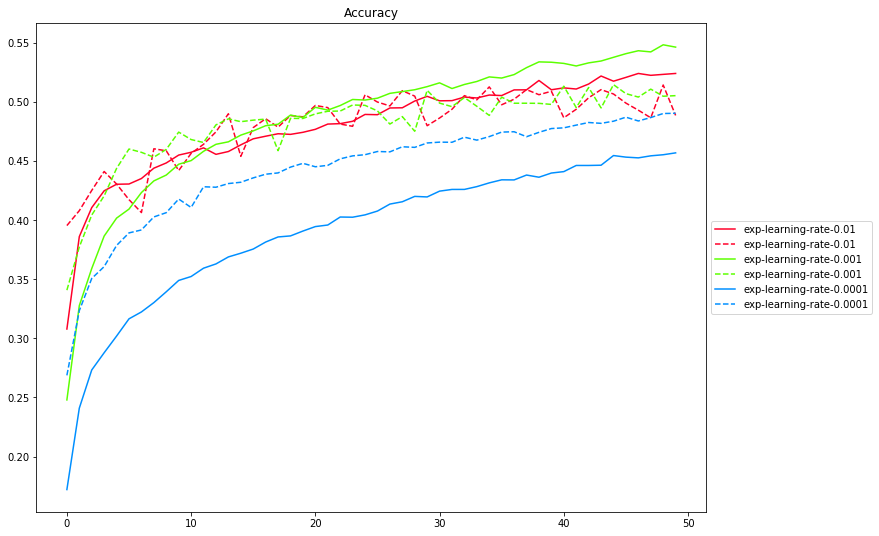

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()